Instructions

It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the song is in the Billboard Hot 200.
2. Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [2]:
# Modelling of the song clusters

In [1]:
# K-means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [14]:
data = pd.read_csv('features_all.csv')


C:\Users\renev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207568 entries, 0 to 207567
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        207568 non-null  int64 
 1   Unnamed: 0.1      207567 non-null  object
 2   id                207567 non-null  object
 3   name              207565 non-null  object
 4   album             207565 non-null  object
 5   artist            207562 non-null  object
 6   duration_ms       207567 non-null  object
 7   release_date      207567 non-null  object
 8   length            207567 non-null  object
 9   popularity        207567 non-null  object
 10  acousticness      207567 non-null  object
 11  danceability      207567 non-null  object
 12  energy            207567 non-null  object
 13  instrumentalness  207567 non-null  object
 14  key               207567 non-null  object
 15  liveness          207567 non-null  object
 16  loudness          207567 non-null  obj

In [24]:
data

,id,name,album,artist,duration_ms,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,000RW47rhEkSqjgTrZx7YX,Lance Individual,Tudo Em Paz,Jorge & Mateus,164459,2021-04-22,164458,62,0.309,0.752,0.62,0.0,5,0.075,-5.536,1,0.0509,117.399,4,0.962
1,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),Still Got Time (feat. PARTYNEXTDOOR),ZAYN,188491,2017-03-23,188490,59,0.131,0.748,0.627,0.0,7,0.0852,-6.029,1,0.0639,120.963,4,0.524
2,000xYdQfIZ4pDmBGzQalKU,"Eu, Você, O Mar e Ela",1977,Luan Santana,187119,2016-11-04,187118,55,0.684,0.509,0.803,0.000539,0,0.463,-6.743,1,0.04,166.018,4,0.651
3,0010ypQ2nPZdksx1kEjt66,As Nieko Nezinau,As Nieko Nezinau,Kamaniu Silelis,226387,2018-04-23,226386,20,0.889,0.703,0.226,0.0284,7,0.0652,-13.457,1,0.0403,118.945,4,0.117
4,00115zIia5fhpbtl4c58RZ,Pokoj,Pokoj,Lenka Piešová,187000,2020-12-04,187000,24,0.143,0.472,0.349,0.000063,1,0.093,-7.34,1,0.0346,121.054,4,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207563,7zzbnhCpuuHOCrhBGvgwpp,Wouldn’t Change A Thing,Need Of You,Lawrence Hancock,184950,2021-05-07,184949,14,0.00189,0.499,0.518,2.48e-05,1,0.117,-7.274,1,0.056,78.022,4,0.0389
207564,7zzhRAobAnNjarw2FAWt65,ארבעה אחים - פסח,שירי החגים הגדולים בכל הזמנים,Various Artists,116867,2011-09-01,116866,0,0.856,0.651,0.344,0.0,7,0.103,-10.621,0,0.037,125.529,3,0.872
207565,7zzhknA0A39TH81meuX7WA,C'est pas des LOL,Rien 100 Rien (Réédition),Jul,279467,2019-10-04,279466,51,0.187,0.939,0.7,0.0,9,0.094,-6.526,0,0.0519,132.004,4,0.886
207566,id,name,album,artist,duration_ms,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [17]:
# Drop unnecessary or duplicate columns

data = data.drop([
'Unnamed: 0',         
'Unnamed: 0.1'   
 ],axis=1)  

In [27]:
# Drop rows not containing audio features

data = data.drop(207566)

In [29]:
data = data.drop(207567)

In [30]:
data

,id,name,album,artist,duration_ms,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,000RW47rhEkSqjgTrZx7YX,Lance Individual,Tudo Em Paz,Jorge & Mateus,164459,2021-04-22,164458,62,0.309,0.752,0.62,0.0,5,0.075,-5.536,1,0.0509,117.399,4,0.962
1,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),Still Got Time (feat. PARTYNEXTDOOR),ZAYN,188491,2017-03-23,188490,59,0.131,0.748,0.627,0.0,7,0.0852,-6.029,1,0.0639,120.963,4,0.524
2,000xYdQfIZ4pDmBGzQalKU,"Eu, Você, O Mar e Ela",1977,Luan Santana,187119,2016-11-04,187118,55,0.684,0.509,0.803,0.000539,0,0.463,-6.743,1,0.04,166.018,4,0.651
3,0010ypQ2nPZdksx1kEjt66,As Nieko Nezinau,As Nieko Nezinau,Kamaniu Silelis,226387,2018-04-23,226386,20,0.889,0.703,0.226,0.0284,7,0.0652,-13.457,1,0.0403,118.945,4,0.117
4,00115zIia5fhpbtl4c58RZ,Pokoj,Pokoj,Lenka Piešová,187000,2020-12-04,187000,24,0.143,0.472,0.349,0.000063,1,0.093,-7.34,1,0.0346,121.054,4,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207561,7zzSBaZl2B3gvnln8h5xef,Три белых коня,Три белых коня,Ivanushki International,188055,2005-01-01,188055,18,0.0513,0.674,0.979,0.0,0,0.337,-3.983,0,0.109,150.032,4,0.882
207562,7zzU5vd1GrHpNjwq3HpIe3,Le petit Nicolas,R.I.P.R.O 4,Lacrim,207667,2020-10-15,207666,37,0.0925,0.689,0.743,0.0,11,0.0511,-8.559,0,0.498,141.728,4,0.349
207563,7zzbnhCpuuHOCrhBGvgwpp,Wouldn’t Change A Thing,Need Of You,Lawrence Hancock,184950,2021-05-07,184949,14,0.00189,0.499,0.518,2.48e-05,1,0.117,-7.274,1,0.056,78.022,4,0.0389
207564,7zzhRAobAnNjarw2FAWt65,ארבעה אחים - פסח,שירי החגים הגדולים בכל הזמנים,Various Artists,116867,2011-09-01,116866,0,0.856,0.651,0.344,0.0,7,0.103,-10.621,0,0.037,125.529,3,0.872


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207566 entries, 0 to 207565
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                207566 non-null  object
 1   name              207564 non-null  object
 2   album             207564 non-null  object
 3   artist            207561 non-null  object
 4   duration_ms       207566 non-null  object
 5   release_date      207566 non-null  object
 6   length            207566 non-null  object
 7   popularity        207566 non-null  object
 8   acousticness      207566 non-null  object
 9   danceability      207566 non-null  object
 10  energy            207566 non-null  object
 11  instrumentalness  207566 non-null  object
 12  key               207566 non-null  object
 13  liveness          207566 non-null  object
 14  loudness          207566 non-null  object
 15  mode              207566 non-null  object
 16  speechiness       207566 non-null  obj

In [32]:
# Change object to float

data['length'] = pd.to_numeric(data['length'])
data['popularity'] = pd.to_numeric(data['popularity'])
data['acousticness'] = pd.to_numeric(data['acousticness'])
data['danceability'] = pd.to_numeric(data['danceability'])
data['energy'] = pd.to_numeric(data['energy'])
data['instrumentalness'] = pd.to_numeric(data['instrumentalness'])
data['key'] = pd.to_numeric(data['key'])
data['liveness'] = pd.to_numeric(data['liveness'])
data['loudness'] = pd.to_numeric(data['loudness'])
data['mode'] = pd.to_numeric(data['mode'])
data['speechiness'] = pd.to_numeric(data['speechiness'])
data['tempo'] = pd.to_numeric(data['tempo'])
data['time_signature'] = pd.to_numeric(data['time_signature'])
data['valence'] = pd.to_numeric(data['valence'])
data['duration_ms'] = pd.to_numeric(data['duration_ms'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207566 entries, 0 to 207565
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                207566 non-null  object 
 1   name              207564 non-null  object 
 2   album             207564 non-null  object 
 3   artist            207561 non-null  object 
 4   duration_ms       207566 non-null  int64  
 5   release_date      207566 non-null  object 
 6   length            207566 non-null  int64  
 7   popularity        207566 non-null  int64  
 8   acousticness      207566 non-null  float64
 9   danceability      207566 non-null  float64
 10  energy            207566 non-null  float64
 11  instrumentalness  207566 non-null  float64
 12  key               207566 non-null  int64  
 13  liveness          207566 non-null  float64
 14  loudness          207566 non-null  float64
 15  mode              207566 non-null  int64  
 16  speechiness       20

In [34]:
audio_features = data[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']]

In [35]:
audio_features 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.752,0.620,5,-5.536,1,0.0509,0.30900,0.000000,0.0750,0.9620,117.399,164459,4
1,0.748,0.627,7,-6.029,1,0.0639,0.13100,0.000000,0.0852,0.5240,120.963,188491,4
2,0.509,0.803,0,-6.743,1,0.0400,0.68400,0.000539,0.4630,0.6510,166.018,187119,4
3,0.703,0.226,7,-13.457,1,0.0403,0.88900,0.028400,0.0652,0.1170,118.945,226387,4
4,0.472,0.349,1,-7.340,1,0.0346,0.14300,0.000063,0.0930,0.1360,121.054,187000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207561,0.674,0.979,0,-3.983,0,0.1090,0.05130,0.000000,0.3370,0.8820,150.032,188055,4
207562,0.689,0.743,11,-8.559,0,0.4980,0.09250,0.000000,0.0511,0.3490,141.728,207667,4
207563,0.499,0.518,1,-7.274,1,0.0560,0.00189,0.000025,0.1170,0.0389,78.022,184950,4
207564,0.651,0.344,7,-10.621,0,0.0370,0.85600,0.000000,0.1030,0.8720,125.529,116867,3


In [52]:
# I am going to remove key, mode and time_signature → these are not scaled features like the other that range e.g. between 0 and 1
audio_features_less = audio_features.drop([
'key',         
'mode','time_signature'   
 ],axis=1) 

In [36]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(audio_features)

In [53]:
X_prep_less = StandardScaler().fit_transform(audio_features_less)

In [37]:
# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=audio_features.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.676500,-0.068031,-0.090190,0.546974,0.877186,-0.555159,0.096825,-0.277117,-0.728997,1.995026,-0.140359,-0.603093,0.1508
1,0.650606,-0.032167,0.464712,0.400269,0.877186,-0.444424,-0.550907,-0.277117,-0.657884,0.109382,-0.015593,-0.316678,0.1508
2,-0.896561,0.869567,-1.477446,0.187800,0.877186,-0.648005,1.461431,-0.274067,1.976087,0.656133,1.561659,-0.333030,0.1508
3,0.359299,-2.086685,0.464712,-1.810124,0.877186,-0.645450,2.207415,-0.116441,-0.797321,-1.642803,-0.086238,0.134967,0.1508
4,-1.136081,-1.456496,-1.199995,0.010147,0.877186,-0.694003,-0.507240,-0.276759,-0.603504,-1.561006,-0.012407,-0.334448,0.1508


In [55]:
pd.DataFrame(X_prep_less,columns=audio_features_less.columns).head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.676500,-0.068031,0.546974,-0.555159,0.096825,-0.277117,-0.728997,1.995026,-0.140359,-0.603093
1,0.650606,-0.032167,0.400269,-0.444424,-0.550907,-0.277117,-0.657884,0.109382,-0.015593,-0.316678
2,-0.896561,0.869567,0.187800,-0.648005,1.461431,-0.274067,1.976087,0.656133,1.561659,-0.333030
3,0.359299,-2.086685,-1.810124,-0.645450,2.207415,-0.116441,-0.797321,-1.642803,-0.086238,0.134967
4,-1.136081,-1.456496,0.010147,-0.694003,-0.507240,-0.276759,-0.603504,-1.561006,-0.012407,-0.334448


In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [39]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    41302
1    88675
2    77589
dtype: int64

In [40]:
clusters

array([1, 1, 1, ..., 1, 0, 2])

In [41]:
kmeans.inertia_

2170832.6386639634

In [42]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

2022396.0034535418


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

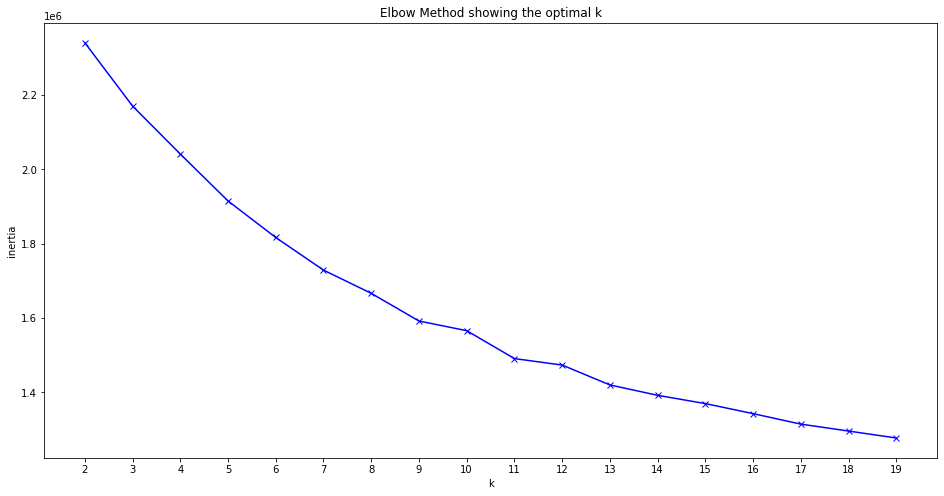

In [43]:
# Choosing K

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


# it appears as if optimal k is around 9

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

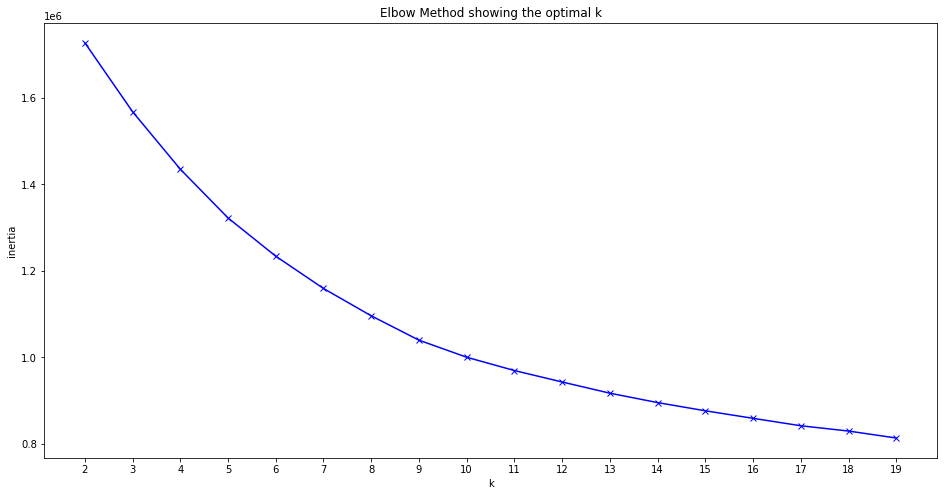

In [56]:
# Choosing K on X_prep_less

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep_less)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


# it appears as if optimal k is around 9

In [46]:
# X_prep

kmeans = KMeans(n_clusters=9,
                init="random",
                n_init=30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

1614695.222988112


In [58]:
# X_prep_less

kmeans = KMeans(n_clusters=9,
                init="random",
                n_init=30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep_less)
print(kmeans.inertia_)

1075108.5429833902


In [ ]:
# Inertia level is lower when using X_prep_less.  I will continue with this one.